In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

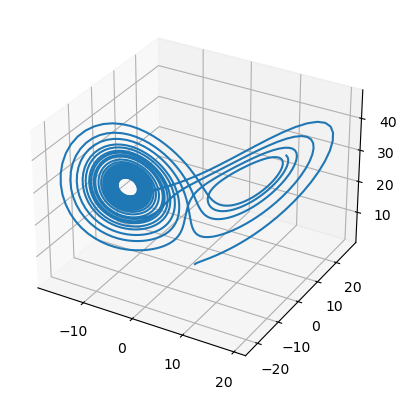

In [2]:
N = 40

def lorenz_model(states, t,a=10,b=28,c=8/3):
    x,y,z = states
    x_dot = a*(y-x)
    y_dot = x*(b-z)-y
    z_dot = x*y-c*z
    return x_dot, y_dot, z_dot

state0 = [1.0, 1.0, 1.0]
t = np.arange(0.0, 20.0, 0.01)

states = odeint(lorenz_model, state0, t)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot(states[:, 0], states[:, 1], states[:, 2])
plt.show()


In [3]:
np.random.seed(123)
epsilon = np.random.normal(0, 0.1,3)

state0 = [1.0, 1.0, 1.0]
ensembles = []

for i in range(N):
    # perturb initial state
    state0_perturbed = state0 + np.random.normal(0, 0.1,3)
    # solve the ODE
    ensemble_member = odeint(lorenz_model, state0_perturbed, t)
    # save the ensemble
    ensembles.append(ensemble_member)

In [4]:
H = np.array([[0, 1, 0], [0, 0, 1]])

# select a random ensemble member
state0_true = state0 + np.random.normal(0, 0.1,3)
x_true = odeint(lorenz_model, state0_true, t)

# generate observations
y = np.dot(H, x_true.T) + np.random.normal(0, 0.01, size=(2, len(t)))

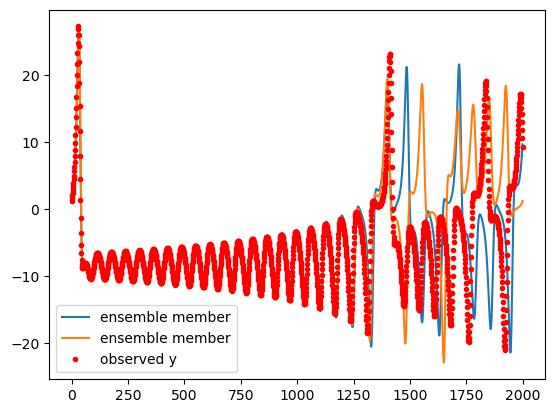

In [5]:
for member in ensembles[:2]:
    plt.plot(member[:, 1],label='ensemble member')
plt.plot(y[0], 'r.',label='observed y')
plt.legend();

In [6]:
x_1450 = []
for member in ensembles:
    x_1450.append(member[1449])
x_1450 = np.array(x_1450).T

In [7]:
# calculate the mean of each ensemble at time step 1450
ensemble_mean = np.mean(x_1450, axis=1) 
# reshape ensemble_mean replicating it N times
ensemble_mean = np.tile(ensemble_mean, (N, 1)).T
chi = (x_1450 - ensemble_mean) / np.sqrt(N-1)

In [8]:
B = np.dot(chi, chi.T)

In [9]:
B

array([[ 27.7143543 ,  36.89957451, -16.94143364],
       [ 36.89957451,  55.97769352, -16.58234646],
       [-16.94143364, -16.58234646,  34.81453899]])

In [17]:
Y = []
for i in range(1450,1500):
    x_io = []
    for member in ensembles:
        x_io.append(member[i])
    x_io = np.array(x_io).T
    ensemble_mean = np.mean(x_io, axis=1)
    ensemble_mean = np.tile(ensemble_mean, (N, 1)).T
    to_add = np.dot(H,x_io) - np.dot(H,ensemble_mean)
    Y.append(to_add)

In [ ]:
# define X_ens as a vector of ranodm numbers size (N,1)
X_ens = np.random.normal(0, 1, size=(N,1))

In [19]:
# observations - model output
Y[0].shape

(2, 40)